In [3]:
#! pip install --upgrade --user numpy scipy matplotlib ipython jupyter pandas sympy nose netcdf4 
#! pip install --user --upgrade pixiedust

In [4]:
# The code was removed by DSX for sharing.

Pixiedust database opened successfully


/gpfs/fs01/user/s2a1-a4a4fc7ce6bf65-e89a3fdacf4a/.local/lib/python2.7/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: bokeh.util.notebook was deprecated in Bokeh 0.12.10 and will be removed, use bokeh.io.notebook instead.
  warn(message)


In [5]:
df_data_2 = pd.read_csv(get_object_storage_file_with_credentials_54e5635a8b7a4b16843aedb7a189b81b('AnalisiSpettraleDati', 'DatiYZL2_NoReplica.csv'),";", decimal=",")
#df_data_2.head()

In [6]:
df_data_1.head()

,Ora,TR/sec,AvgResp/sec,AvgRls/sec,JCwait/sec,RMItime/sec
0,08:25:01,182,0.010,0.001,0.008,0.0
1,08:25:02,168,0.009,0.001,0.008,0.0
2,08:25:03,142,0.009,0.001,0.008,0.0
3,08:25:04,161,0.011,0.001,0.009,0.0
4,08:25:05,170,0.014,0.001,0.012,0.0


In [7]:
df_data_2.head()

,Ora,TR/sec 17 Maggio,AvgResp/sec 17 Maggio,AvgRls/sec,JCwait/sec,RMItime/sec
0,08:25:01,96,0.007,0.001,0.006,0
1,08:25:02,104,0.003,0.001,0.002,0
2,08:25:03,75,0.006,0.001,0.005,0
3,08:25:04,100,0.006,0.001,0.005,0
4,08:25:05,81,0.005,0.001,0.004,0


In [8]:
#print(df_data_1.count)
conv_arr= df_data_1.values
conv_arr_noDR=df_data_2.values

In [9]:
arr1 = np.delete(conv_arr,[0,1,3,4,5],axis=1)
arr2 = np.squeeze(np.asarray(arr1))
#print(arr2)
#print(arr2.size)

In [10]:
arr1_noDR = np.delete(conv_arr_noDR,[0,1,3,4,5],axis=1)
arr2_noDR = np.squeeze(np.asarray(arr1_noDR))
#print(arr2_noDR)
#print(arr2_noDR.size)

In [11]:
time1 = np.delete(conv_arr_noDR,[1,2,3,4,5],axis=1)
time2 = np.squeeze(np.asarray(time1))

/gpfs/fs01/user/s2a1-a4a4fc7ce6bf65-e89a3fdacf4a/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


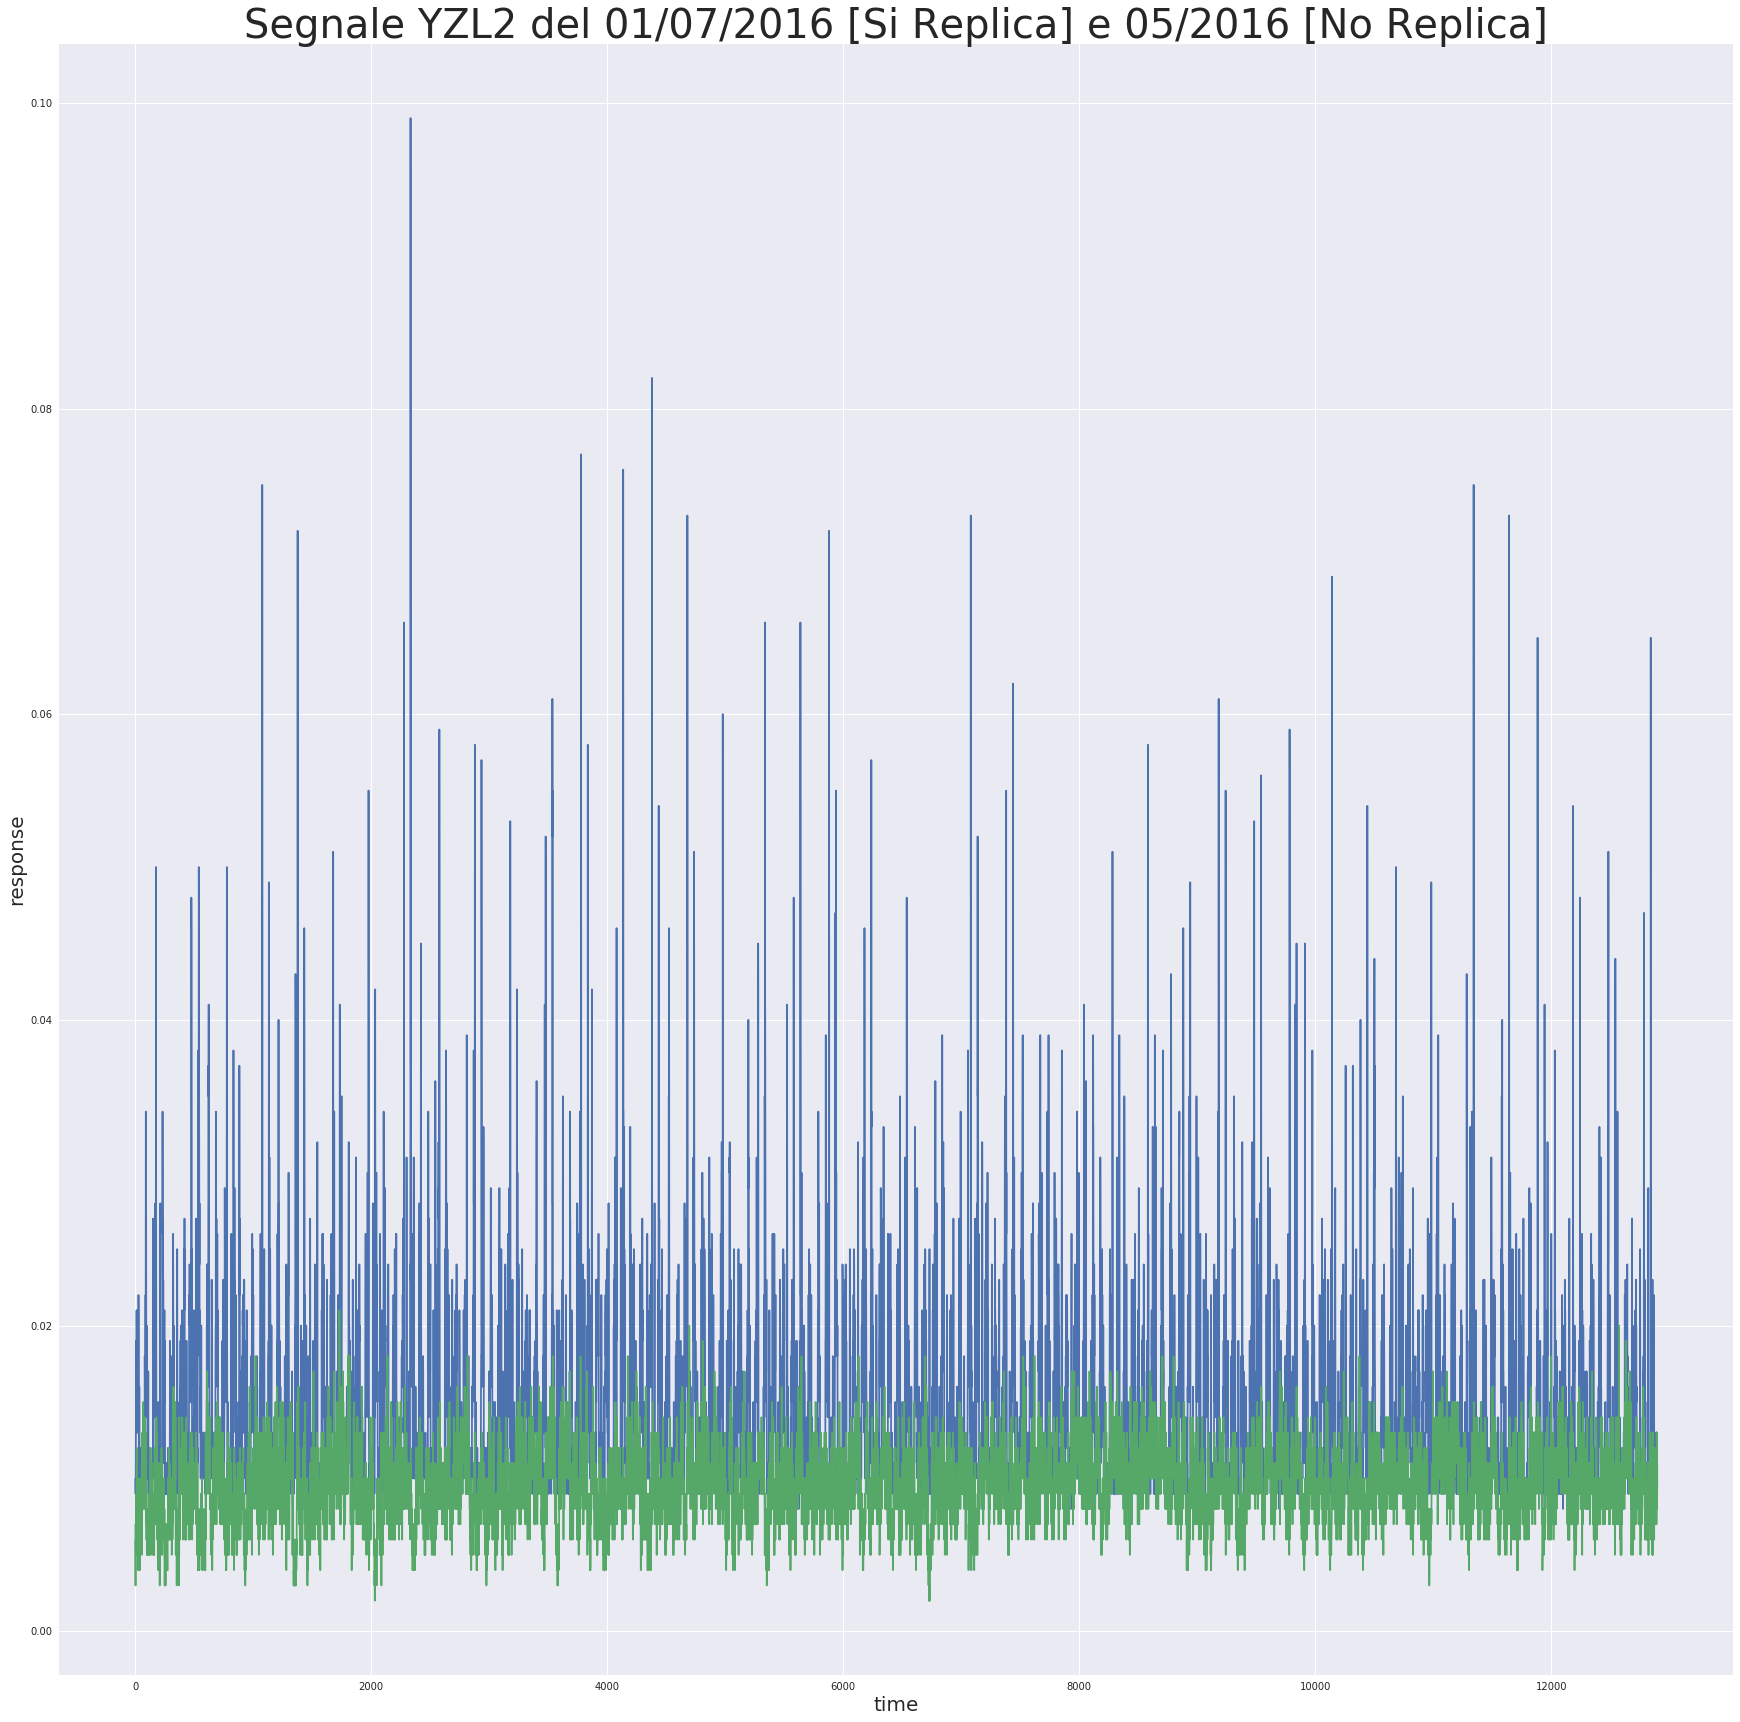

In [12]:
plt.figure(figsize=(30,30))
xx = np.arange(1, arr2.size+1, 1)
plt.plot(xx,arr2,xx, arr2_noDR )
plt.ylabel('response', fontsize=20)
plt.xlabel('time', fontsize=20)
plt.title('Segnale YZL2 del 01/07/2016 [Si Replica] e 05/2016 [No Replica]', fontsize=40)
plt.show()


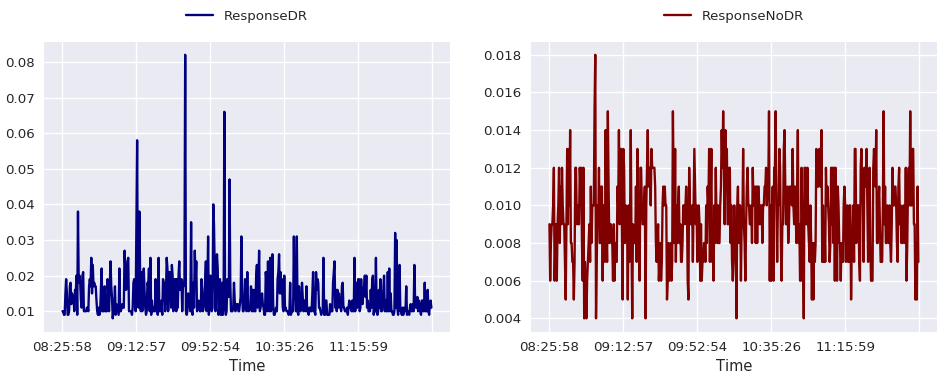

In [13]:
pd_signals=pd.DataFrame(data={'ResponseDR':arr2, 'ResponseNoDR':arr2_noDR,'Time':time2},dtype=float)
#pd_signals.head()
display(pd_signals)

In [14]:
f, Pxx_spec = signal.welch(arr2, window ='hann',fs=1.0,nperseg =8192,  scaling='spectrum') 
f1, Pxx_spec1 = signal.welch(arr2_noDR, window ='hann',fs=1.0,nperseg =8192,  scaling='spectrum') 
#print(f.size)
#print(Pxx_spec.size)

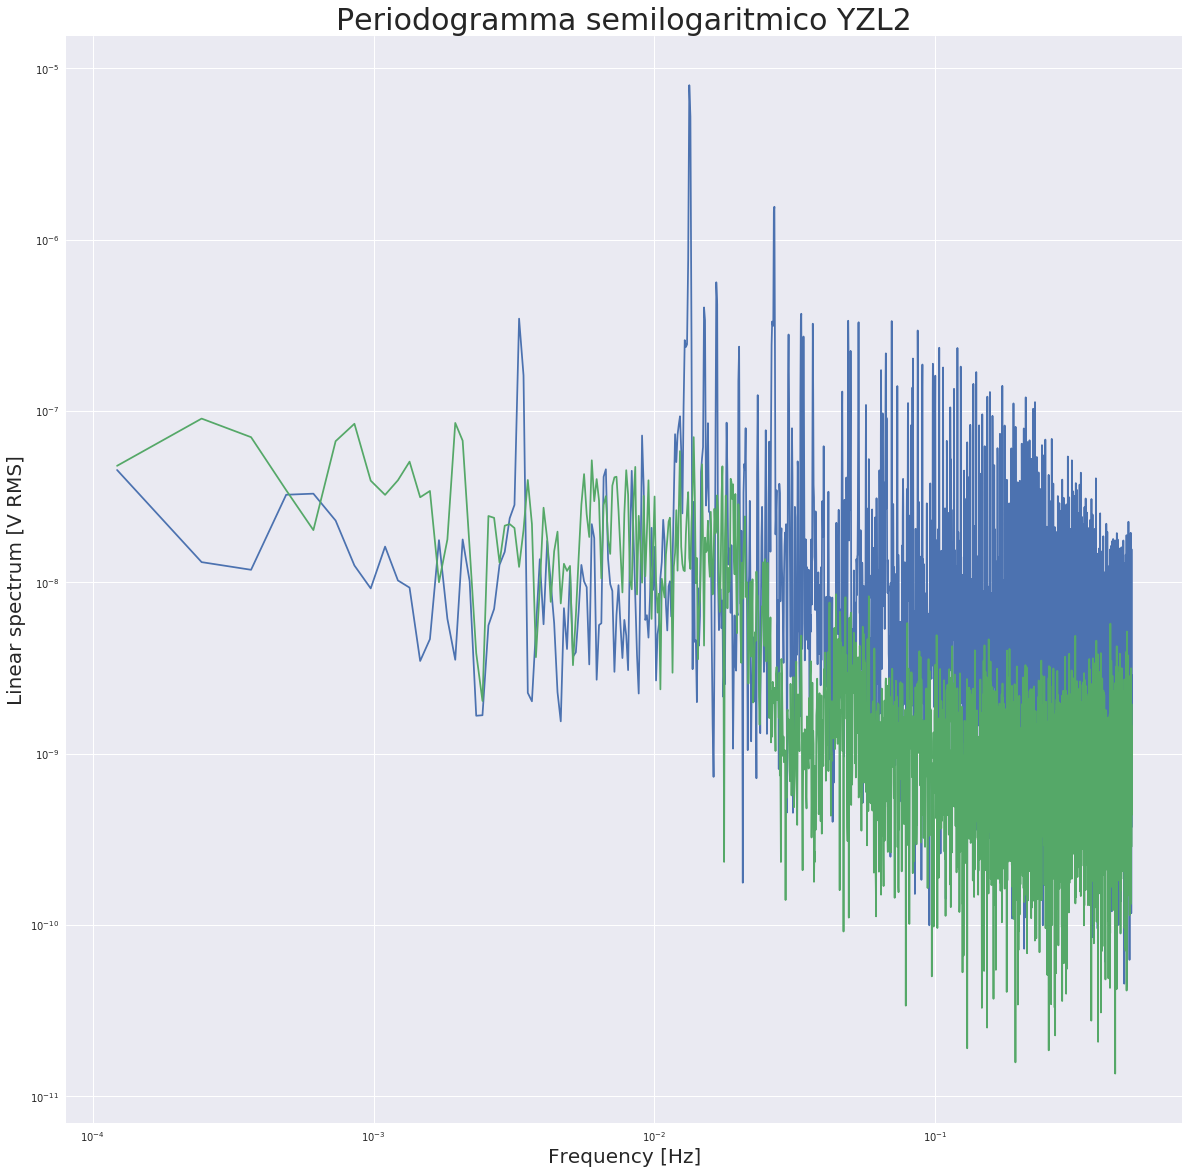

In [15]:
plt.figure(figsize=(20,20))
plt.yscale('log')
plt.xscale('log')
plt.plot(f, np.absolute(Pxx_spec),f1, np.absolute(Pxx_spec1) )
plt.xlabel('Frequency [Hz]', fontsize=20)
plt.ylabel('Linear spectrum [V RMS]', fontsize=20)
plt.title('Periodogramma semilogaritmico YZL2', fontsize=30)
plt.show()

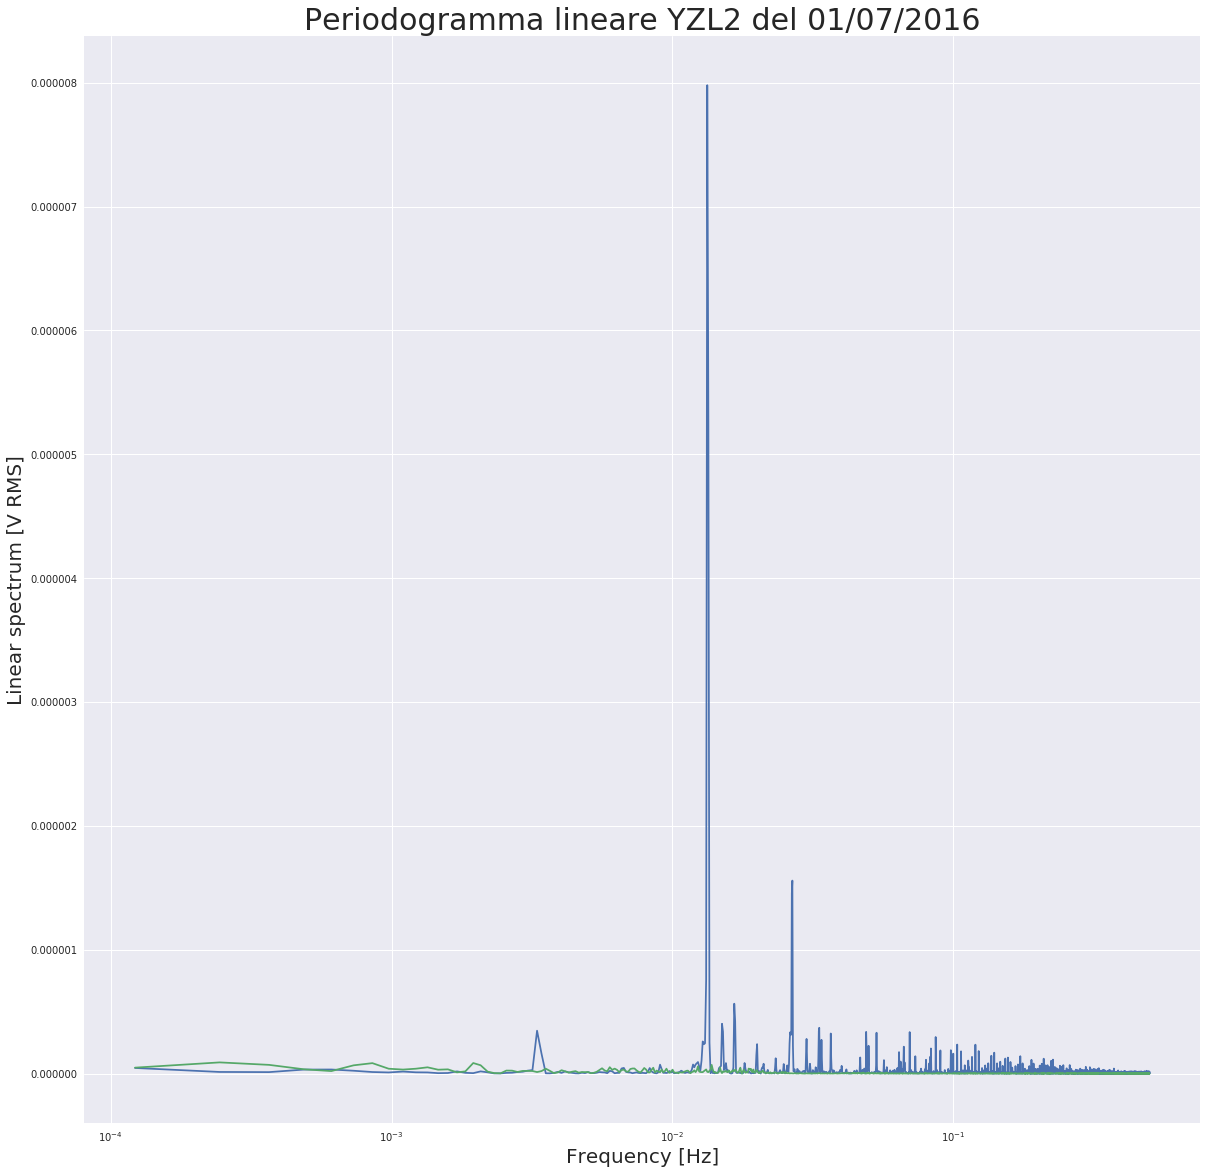

In [16]:
plt.figure(figsize=(20,20))
plt.xscale('log')
plt.plot(f, np.absolute(Pxx_spec),f1, np.absolute(Pxx_spec1))
plt.title('Periodogramma lineare YZL2 del 01/07/2016', fontsize=30)
plt.xlabel('Frequency [Hz]', fontsize=20)
plt.ylabel('Linear spectrum [V RMS]', fontsize=20)
plt.show()


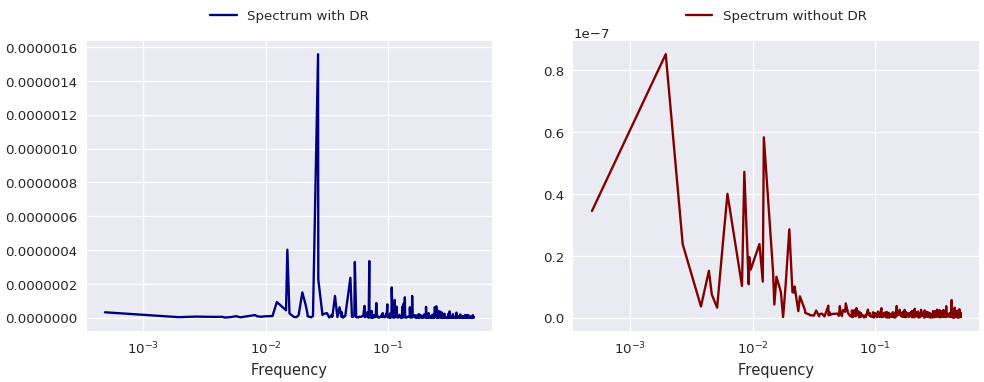

In [17]:
pd_spectre=pd.DataFrame(data={'Spectrum with DR':np.squeeze(np.absolute(Pxx_spec)), 'Spectrum without DR':np.squeeze(np.absolute(Pxx_spec1)),'Frequency':f},dtype=float)
#pd_spectre.head()
display(pd_spectre)

In [18]:
pd.set_option('display.max_rows', 8192) 
pd_spectre.head(8192)

,Frequency,Spectrum with DR,Spectrum without DR
0,0.000000,2.387259e-09,7.157666e-09
1,0.000122,4.528923e-08,4.790366e-08
2,0.000244,1.312612e-08,9.036249e-08
3,0.000366,1.184075e-08,7.038262e-08
4,0.000488,3.247034e-08,3.452784e-08
5,0.000610,3.294471e-08,2.018706e-08
6,0.000732,2.294472e-08,6.670367e-08
7,0.000854,1.254587e-08,8.428262e-08
8,0.000977,9.219438e-09,3.923343e-08
9,0.001099,1.617121e-08,3.241730e-08


In [19]:
analisi =np.absolute(Pxx_spec) 
analisi_noDR=np.absolute(Pxx_spec1) 
periodo_max_DR=1/f[np.argmax(analisi)]
periodo_max_NODR=1/f[np.argmax(analisi_noDR)]
powerMax_DR =np.amax(analisi)
powerMax_noDR =np.max(analisi_noDR)
print('Situazione con replica ASINCRONA ATTIVA: Periodo di Massimo: ' + str(periodo_max_DR) +'  valore di massimo: ' +str(powerMax_DR))
print('Situazione con replica ASINCRONA NON ATTIVA: Periodo di Massimo: ' + str(periodo_max_NODR) +'  valore di massimo: ' +str(powerMax_noDR))
print('Rapporto fra picchi spettro: ' + str(powerMax_DR/powerMax_noDR))

Situazione con replica ASINCRONA ATTIVA: Periodo di Massimo: 75.1559633028  valore di massimo: 7.97992800572e-06
Situazione con replica ASINCRONA NON ATTIVA: Periodo di Massimo: 4096.0  valore di massimo: 9.03624944292e-08
Rapporto fra picchi spettro: 88.3101784222
